In [9]:
# Ignore warnings to keep the output clean
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Import necessary libraries for data manipulation, visualization, and model building
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Load the dataset from the CSV file
data = pd.read_csv(r"C:\Users\user\Downloads\StudentPerformanceFactors.csv")

In [12]:
# Preview the first 10 rows of the dataset
data.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [13]:
# Check the dimensions (rows, columns) of the dataset
data.shape

(6607, 20)

In [14]:
# Get an overview of the dataset structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [15]:
# Get descriptive statistics for numerical columns
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [16]:
# Get descriptive statistics for categorical columns
data.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [17]:
# Check if there are any missing values in the dataset
data.columns[data.isnull().any()]

Index(['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], dtype='object')

In [18]:
# Identify categorical columns by checking for object data type
categorical_columns=[col for col in data.columns if data[col].dtype=='object']
categorical_columns

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

In [19]:
data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace=True)
data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0], inplace=True)
data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0], inplace=True)


In [20]:
# Check if there are any missing values in the dataset
data.columns[data.isnull().any()].to_list()

[]

In [21]:
# Calculate the range of 'Exam_Score' (max - min)
max_score = data['Exam_Score'].max()
min_score = data['Exam_Score'].min()
score_range = max_score - min_score
print(f"\nRange of Exam Scores: {score_range}")


Range of Exam Scores: 46


In [22]:
# Calculate and display mean and standard deviation of 'Exam_Score'
print("\nMean and Standard Deviation of Exam Score:")
mean_exam = data['Exam_Score'].mean()
std_exam = data['Exam_Score'].std()
print(f"Mean: {mean_exam}  , Standard Deviation: {std_exam}")



Mean and Standard Deviation of Exam Score:
Mean: 67.23565914938702  , Standard Deviation: 3.890455781261724


In [23]:
# Calculate the number of students with above-average 'Exam_Score'
above_avg_count = data[data['Exam_Score'] > mean_exam].shape[0]
print(f"\nNumber of Students with Above Average Scores: {above_avg_count}")


Number of Students with Above Average Scores: 3008


In [24]:
# Calculate and display mean and standard deviation of 'Hours_Studied'
mean_hours_studied = data['Hours_Studied'].mean()
std_hours_studied = data['Hours_Studied'].std()
print(f"\nMean Hours Studied: {mean_hours_studied}, Standard Deviation: {std_hours_studied}")


Mean Hours Studied: 19.975329196306948, Standard Deviation: 5.990594336578764


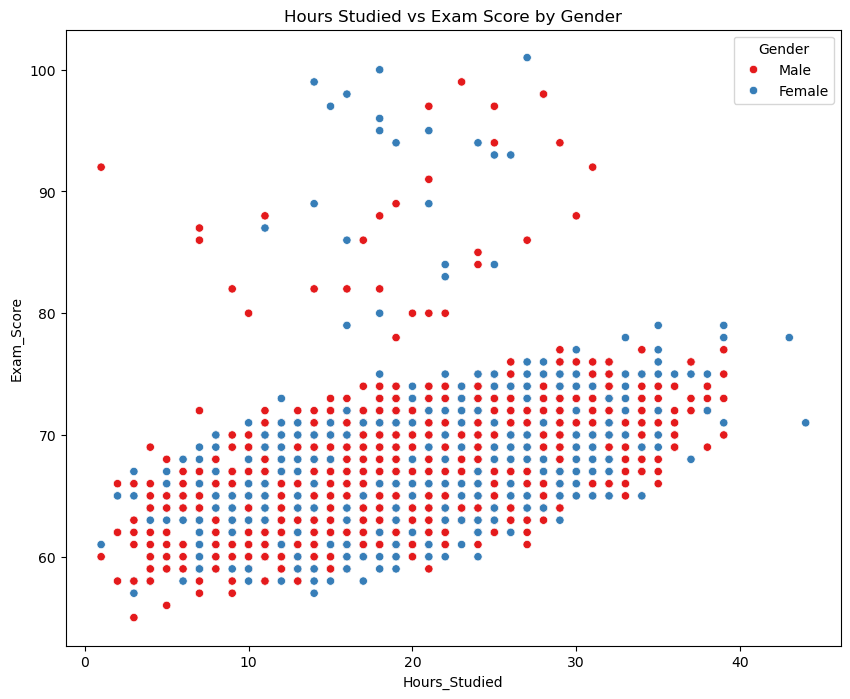

In [25]:
# Scatter plot showing the relationship between Hours Studied and Exam Score, differentiated by Gender
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Gender', data=data, palette='Set1')
plt.title('Hours Studied vs Exam Score by Gender')
plt.show()


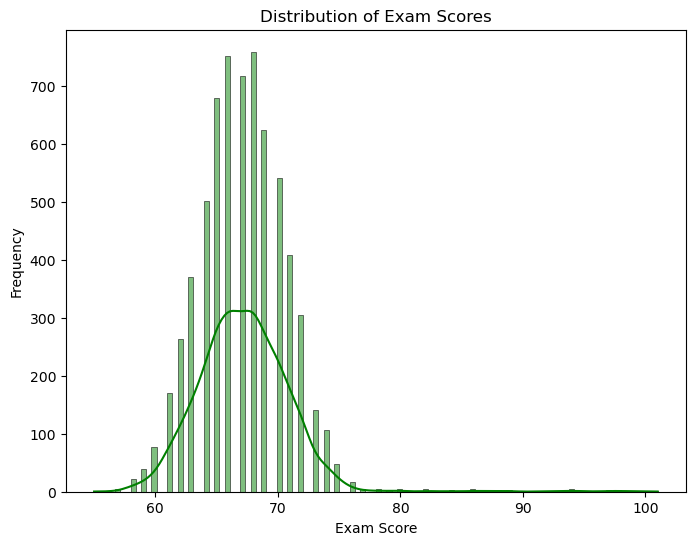

In [26]:
# Histogram showing the distribution of Exam Scores with a KDE (Kernel Density Estimate) for smoothing
plt.figure(figsize=(8, 6))
sns.histplot(data['Exam_Score'], kde=True, color='green')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

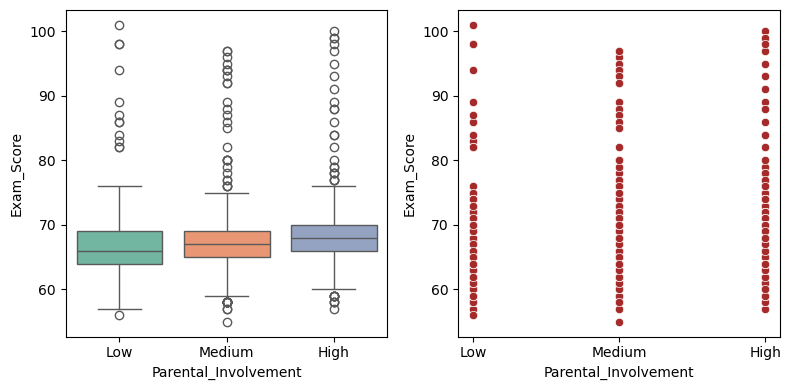

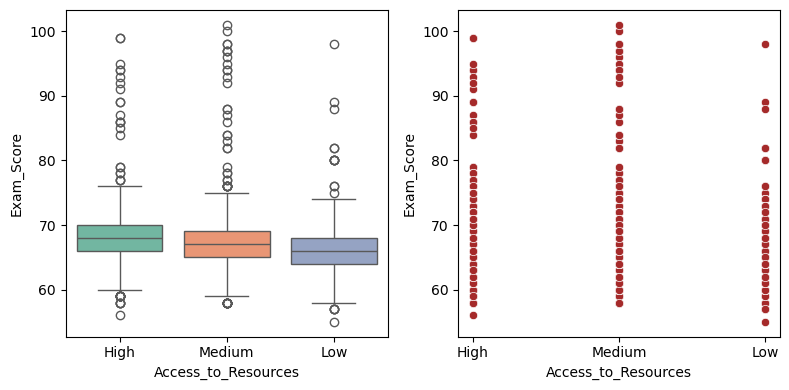

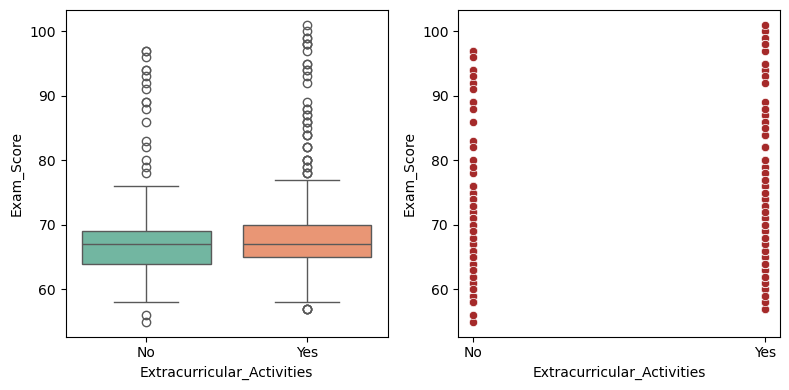

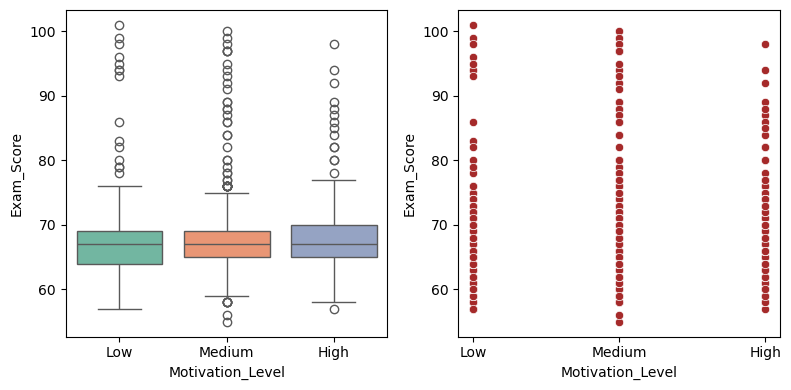

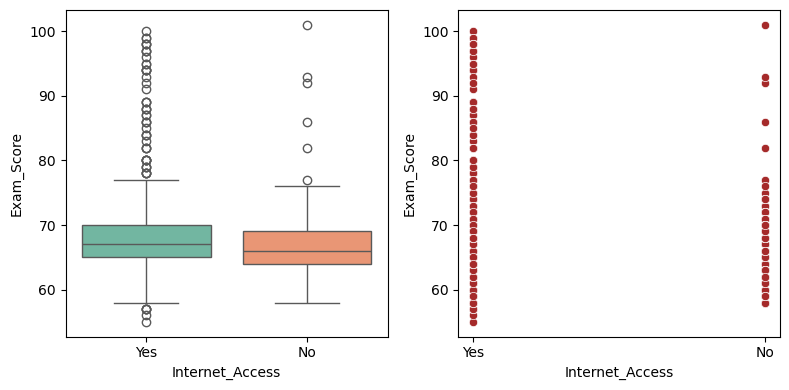

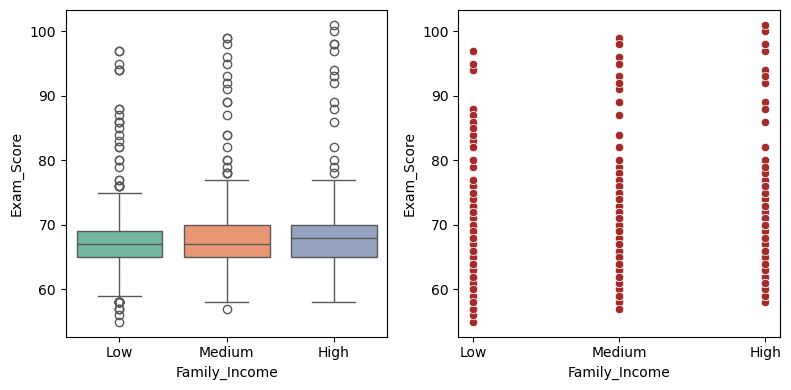

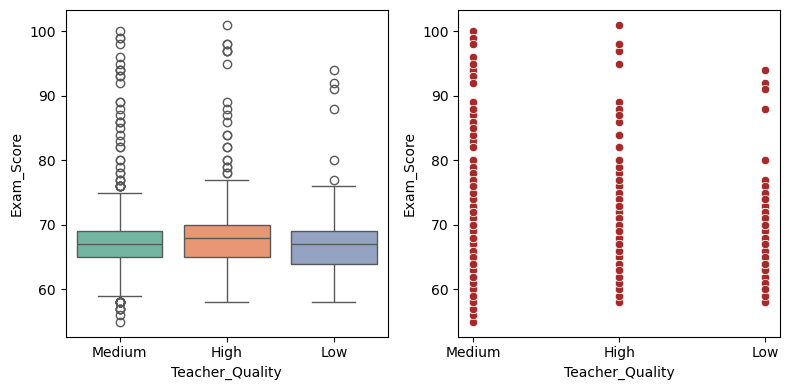

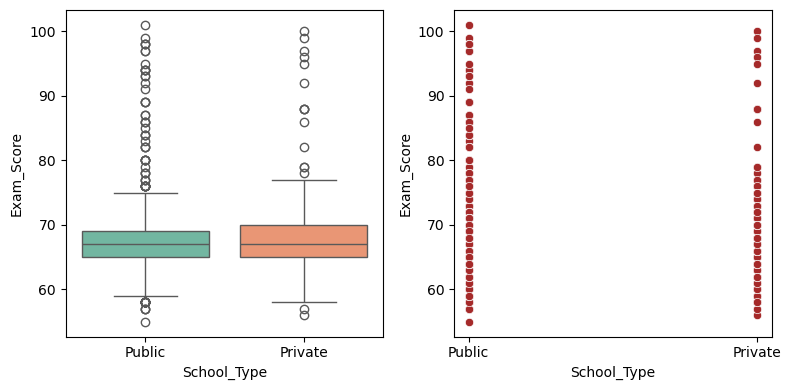

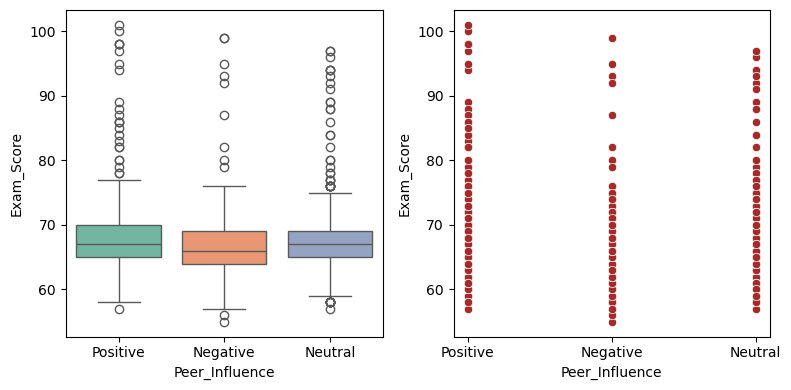

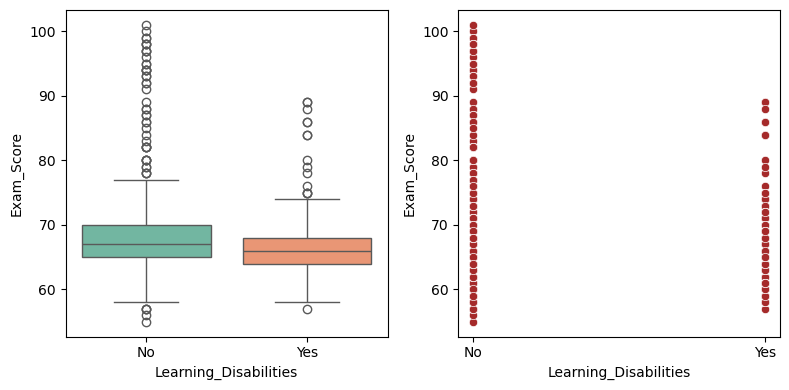

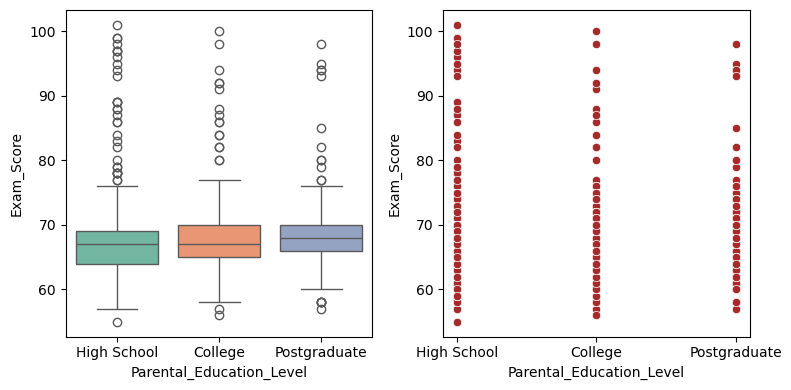

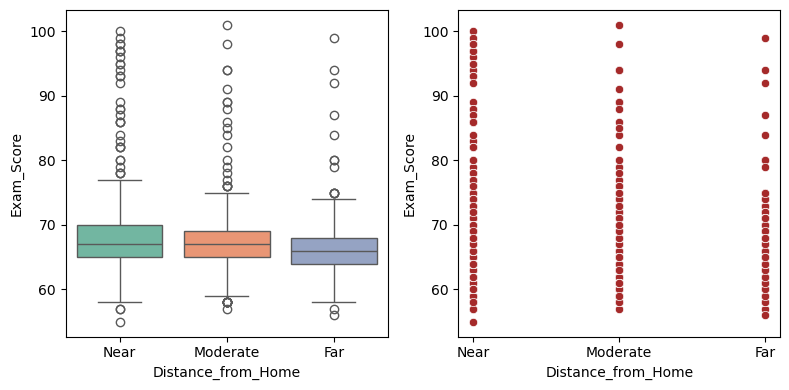

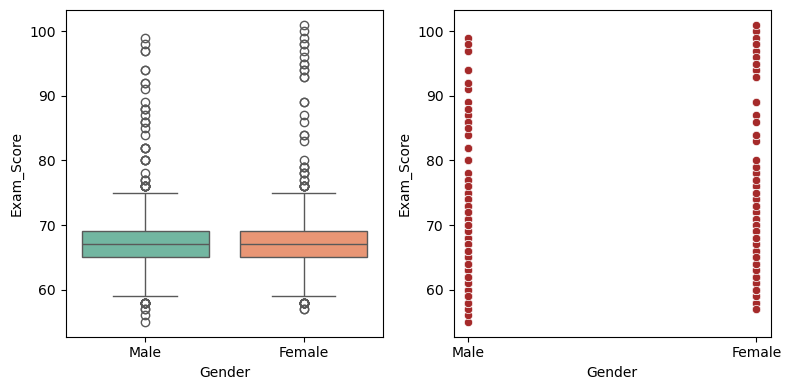

In [27]:
# Plotting categorical features against Exam Score using subplots
# Visualizes relationships between multiple categorical columns and Exam Scorefor i in range(len(categorical_columns)):
for i in range(len(categorical_columns)):
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[categorical_columns[i]], y=data['Exam_Score'], palette='Set2')
    plt.tight_layout()
    
 
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=data[categorical_columns[i]], y=data['Exam_Score'], color='brown')
    plt.tight_layout()
    
    plt.show()


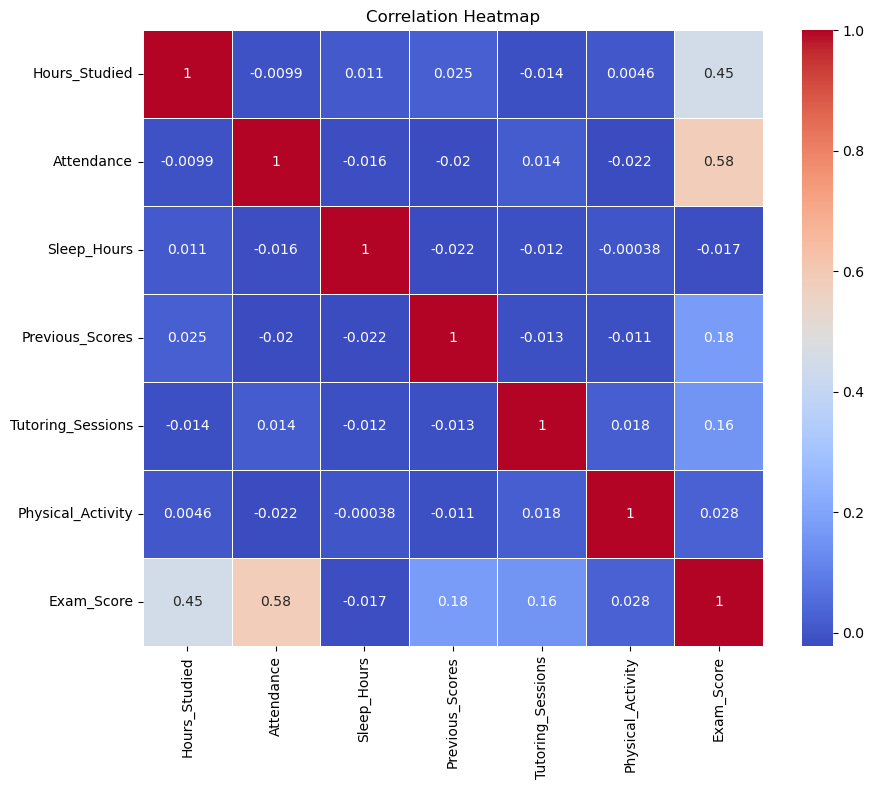

In [28]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Heatmap showing correlations between numerical features in the dataset
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



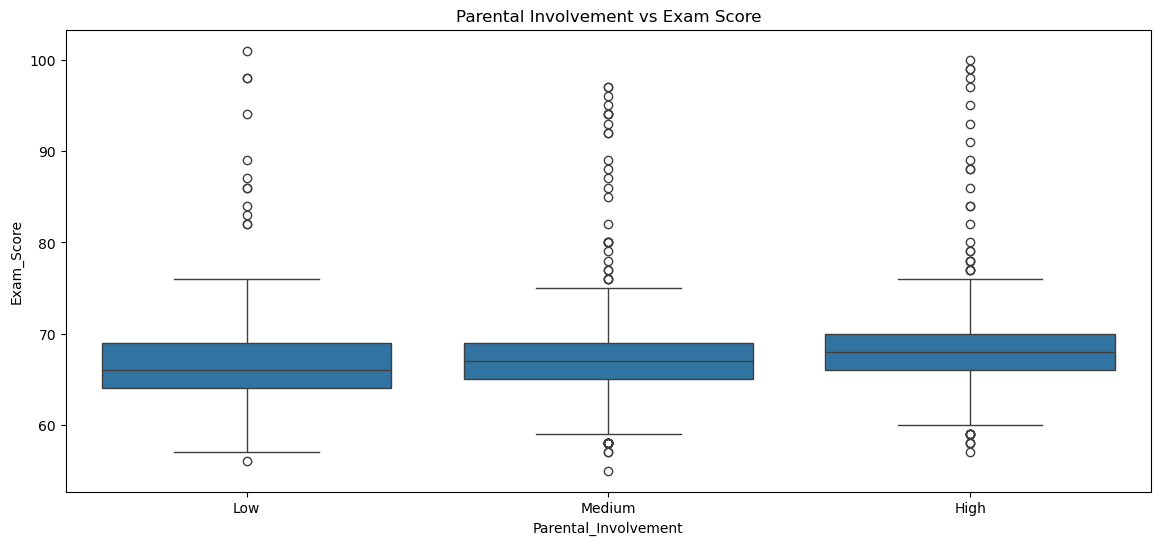

In [29]:
# Boxplot showing the relationship between Parental Involvement and Exam Score
plt.figure(figsize=(14, 6))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=data)
plt.title('Parental Involvement vs Exam Score')
plt.show()

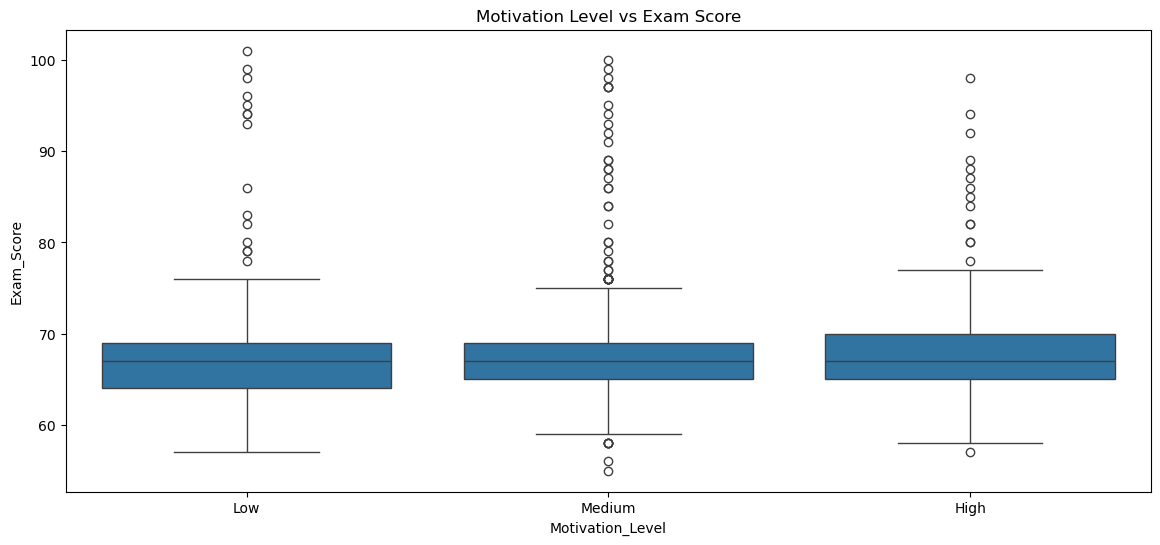

In [30]:
# Boxplot showing the relationship between Motivation Level and Exam Score
plt.figure(figsize=(14, 6))
sns.boxplot(x='Motivation_Level', y='Exam_Score', data=data)
plt.title('Motivation Level vs Exam Score')
plt.show()

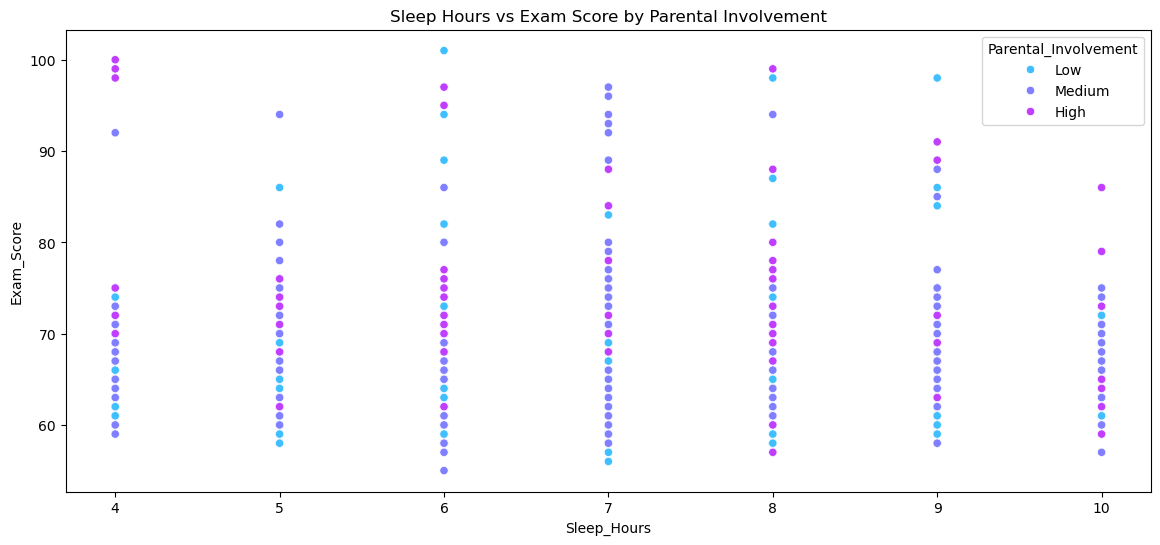

In [31]:
# Scatterplot showing Sleep Hours vs Exam Score, categorized by Parental Involvement
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', hue='Parental_Involvement', data=data, palette='cool')
plt.title('Sleep Hours vs Exam Score by Parental Involvement')
plt.show()

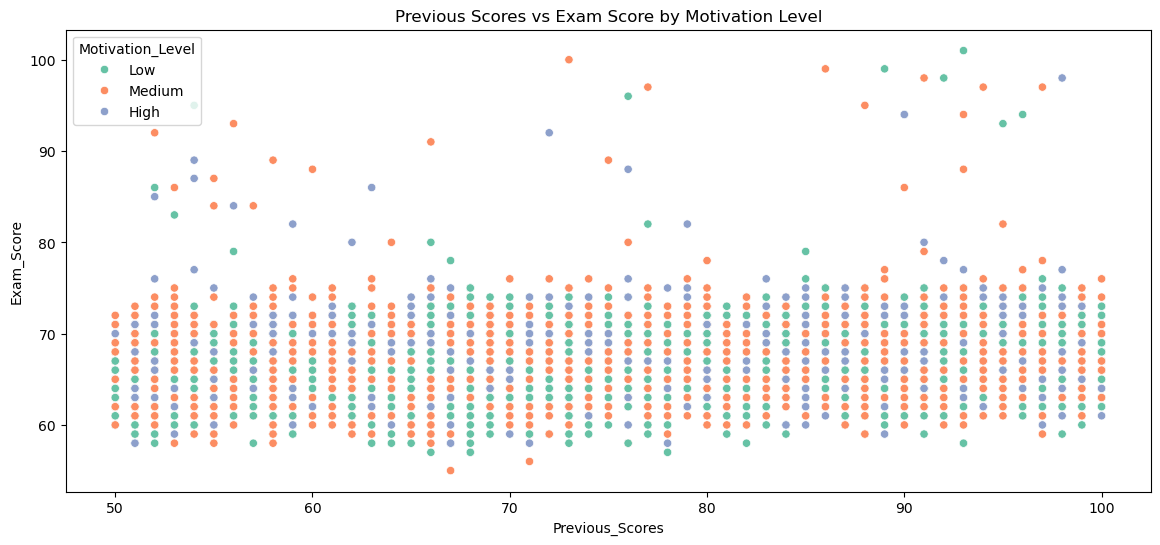

In [32]:
# Scatterplot showing Previous Scores vs Exam Score, categorized by Motivation Level
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Previous_Scores', y='Exam_Score', hue='Motivation_Level', data=data, palette='Set2')
plt.title('Previous Scores vs Exam Score by Motivation Level')
plt.show()

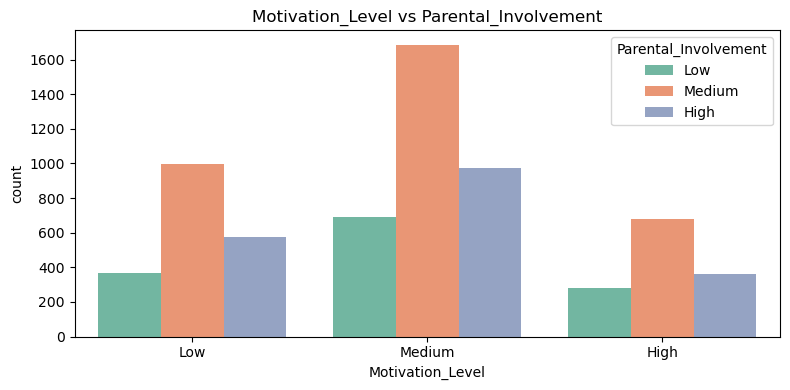

In [33]:
# Countplot showing Motivation Level and Parental Involvement distribution
plt.figure(figsize=(8,4))
sns.countplot(x=data['Motivation_Level'],hue=data['Parental_Involvement'],palette='Set2')
plt.title('Motivation_Level vs Parental_Involvement')
plt.tight_layout()

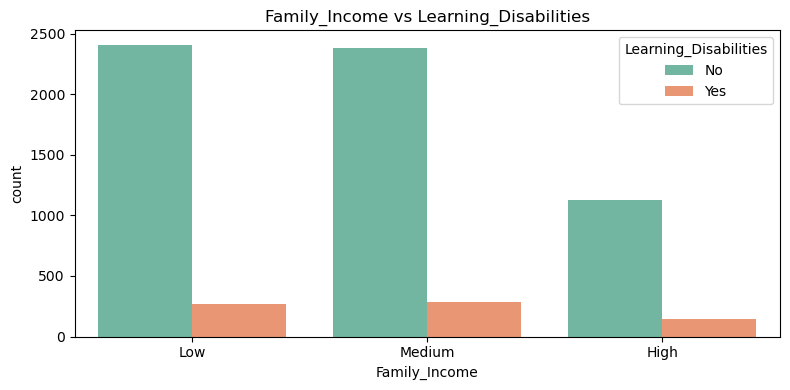

In [34]:
# Countplot showing Family Income distribution by Learning Disabilities
plt.figure(figsize=(8,4))
sns.countplot(x=data['Family_Income'],hue=data['Learning_Disabilities'],palette='Set2')
plt.title('Family_Income vs Learning_Disabilities')
plt.tight_layout()

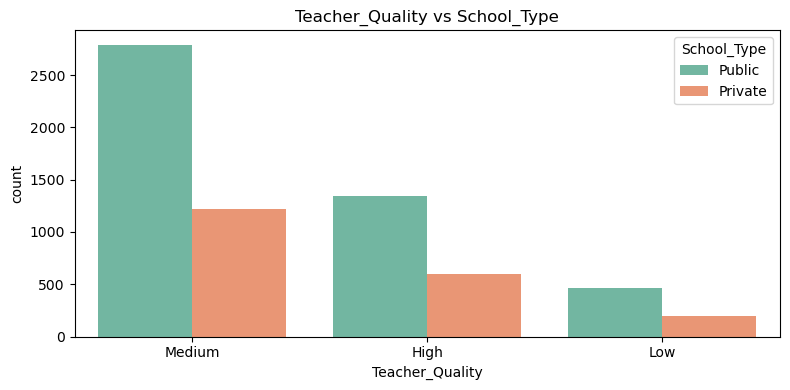

In [35]:
# Countplot showing Teacher Quality distribution by School Type
plt.figure(figsize=(8,4))
sns.countplot(x=data['Teacher_Quality'],hue=data['School_Type'],palette='Set2')
plt.title('Teacher_Quality vs School_Type')
plt.tight_layout()

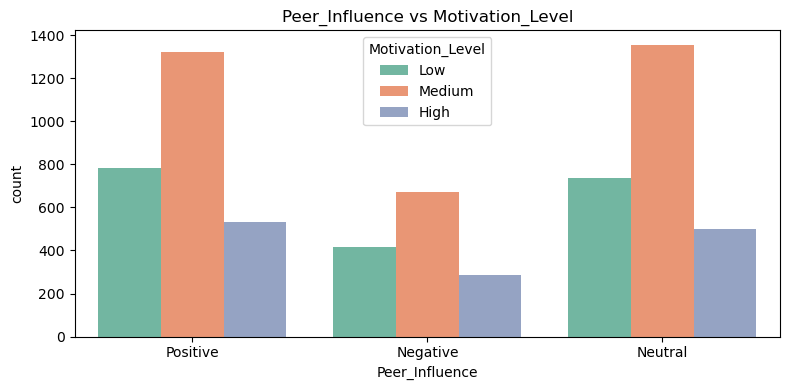

In [36]:
# Countplot showing Peer Influence distribution by Motivation Level
plt.figure(figsize=(8,4))
sns.countplot(x=data['Peer_Influence'],hue=data['Motivation_Level'],palette='Set2')
plt.title('Peer_Influence vs Motivation_Level')
plt.tight_layout()

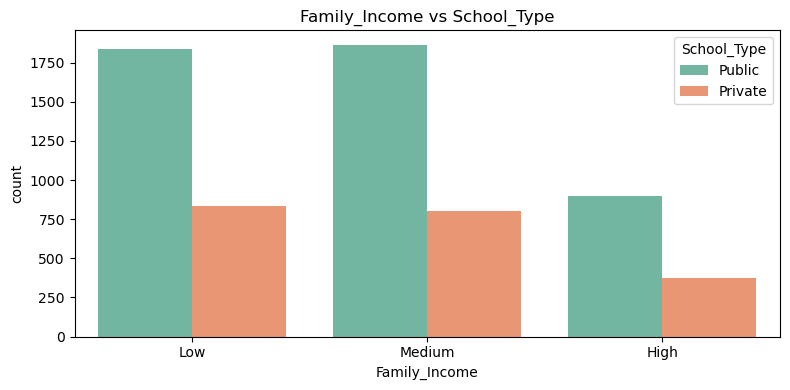

In [37]:
# Countplot showing Family Income distribution by Learning Disabilities
plt.figure(figsize=(8,4))
sns.countplot(x=data['Family_Income'],hue=data['School_Type'],palette='Set2')
plt.title('Family_Income vs School_Type')
plt.tight_layout()

In [38]:
# Countplot showing Teacher Quality distribution by School Type
dummy=pd.get_dummies(data[categorical_columns],drop_first=True)
dummy.shape

(6607, 21)

In [39]:
# Countplot showing Peer Influence distribution by Motivation Level
data.drop(columns=categorical_columns,inplace=True)
data=pd.concat([data,dummy],axis=1)

In [40]:
# Preview the first 10 rows of the dataset After update
data.head(10)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False
5,19,88,8,89,3,3,71,False,True,False,...,True,True,False,True,False,False,True,False,True,True
6,29,84,7,68,1,2,67,False,True,True,...,True,False,True,False,False,True,False,True,False,True
7,25,78,6,50,1,2,66,True,False,False,...,False,True,False,False,False,True,False,False,False,True
8,17,94,6,80,0,1,69,False,True,False,...,False,False,True,False,False,False,False,False,True,True
9,23,98,8,71,0,5,72,False,True,False,...,False,True,False,True,False,True,False,True,False,True


In [41]:
# Dropping the 'Exam_Score' column to get features in X and target variable in y
X = data.drop('Exam_Score', axis=1)
y = data['Exam_Score']

In [42]:
# Splitting the data into training and testing sets (85% training, 15% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [43]:
# Scaling the features using MinMaxScaler to a range between 0 and 1
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Checking the shape of the original dataset
data.shape

(6607, 28)

In [45]:
# Checking the shape of the training and test sets to confirm split
print(X_train.shape)
print(X_test.shape)

(5615, 27)
(992, 27)


In [46]:
# Training a Linear Regression model on the scaled training data
lr=LinearRegression()
lr.fit(X_train,y_train)

# Making predictions on the test set using the trained Linear Regression model
y_pred=lr.predict(X_test)

# Calculating and printing the mean squared error (MSE) and R² scores for training and test sets
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",lr.score(X_train,y_train))
print("test_score: ",lr.score(X_test,y_test))

mean_squared_error:  2.914759419149787
train_score:  0.7155379328418771
test_score:  0.7970007903200632


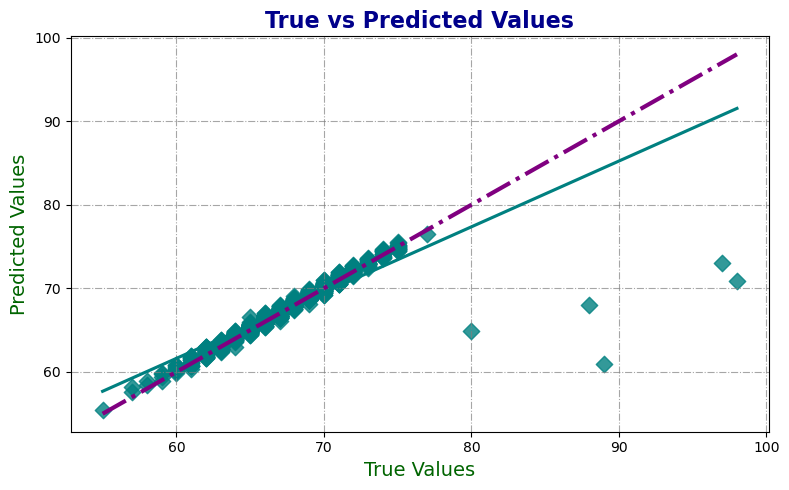

In [47]:
# Plotting the comparison between True vs Predicted values using a scatter plot and regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='teal', marker='D', scatter_kws={'s':70, 'alpha':0.8})

# Plotting reference line for perfect prediction
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='-.', lw=3)

# Setting plot titles and labels
plt.title('True vs Predicted Values', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('True Values', fontsize=14, color='darkgreen')
plt.ylabel('Predicted Values', fontsize=14, color='darkgreen')

# Adding grid and adjusting layout
plt.grid(True, linestyle='-.', alpha=0.7, color='grey')

plt.tight_layout()
plt.show()


In [48]:
# Training a Ridge Regression model on the scaled training data (with regularization alpha=1.0)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Making predictions on the test set using the trained Ridge Regression model
y_pred_ridge = ridge.predict(X_test)

# Calculating and printing the mean squared error (MSE) and R² scores for the Ridge model
print("mean_squared_error (Ridge): ", mean_squared_error(y_test, y_pred_ridge))
print("train_score (Ridge): ", ridge.score(X_train, y_train))
print("validation_score (Ridge): ", ridge.score(X_test, y_test))


mean_squared_error (Ridge):  2.914534897239158
train_score (Ridge):  0.7155374637698777
validation_score (Ridge):  0.7970164272093769


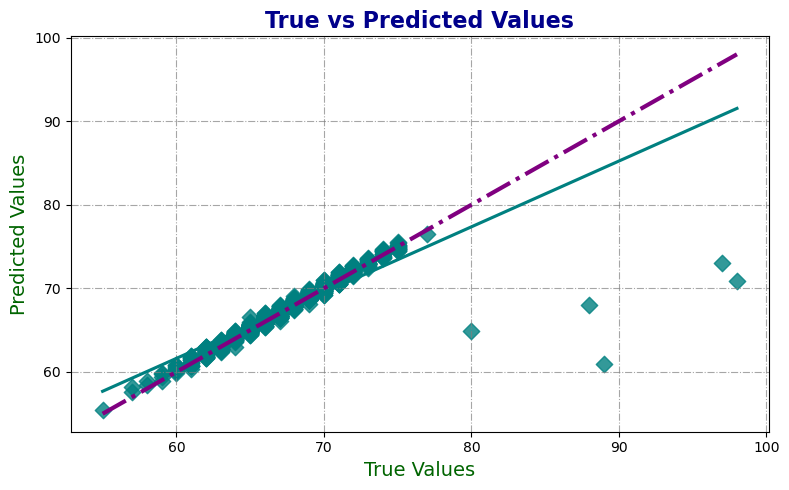

In [49]:
# Plotting True vs Predicted values for Linear Regression
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='teal', marker='D', scatter_kws={'s':70, 'alpha':0.8})

# Defining max and min values for plot limits
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))

# Plotting a line from min to max value for reference
plt.plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='-.', lw=3)

# Setting title and labels
plt.title('True vs Predicted Values', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('True Values', fontsize=14, color='darkgreen')
plt.ylabel('Predicted Values', fontsize=14, color='darkgreen')

# Adding grid and layout adjustment
plt.grid(True, linestyle='-.', alpha=0.7, color='grey')

plt.tight_layout()
plt.show()


In [50]:
# Support Vector Regression (SVR) Model
svr=SVR()
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)

# Printing evaluation metrics for SVR
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",svr.score(X_train,y_train))
print("test_score: ",svr.score(X_test,y_test))

mean_squared_error:  4.644923401357573
train_score:  0.5919953286177229
test_score:  0.6765030508849088


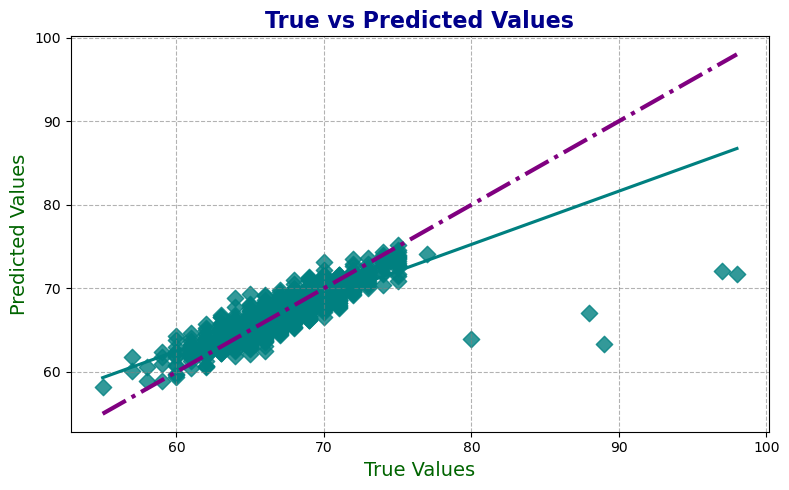

In [51]:
# Plotting True vs Predicted values for SVR
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='teal', marker='D', scatter_kws={'s':70, 'alpha':0.8})

# Defining max and min values for plot limits
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))

# Plotting a line from min to max value for reference
plt.plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='-.', lw=3)

# Setting title and labels
plt.title('True vs Predicted Values', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('True Values', fontsize=14, color='darkgreen')
plt.ylabel('Predicted Values', fontsize=14, color='darkgreen')

# Adding grid and layout adjustment
plt.grid(True, linestyle='--', alpha=0.6, color='grey')

plt.tight_layout()
plt.show()


In [52]:
# Defining a dictionary of models
models = {
    'Linear Regression': lr,
    'Ridge': ridge,
    'SVR': svr
}

# List to store accuracy scores
acc = []
# Calculating the test score for each model
for name, model in models.items():
    score = model.score(X_test, y_test)
    acc.append((name, score))

# Printing the accuracy scores of each model
for model_name, score in acc:
    print(f"{model_name}: {score:.6f}")


Linear Regression: 0.797001
Ridge: 0.797016
SVR: 0.676503


In [53]:
# Extracting the model names and accuracy scores
acc=[]
names=['LinearRegression','Ridge','SVR'] 
acc.extend([lr.score(X_test,y_test),ridge.score(X_test,y_test),svr.score(X_test,y_test)])

In [54]:
acc

[0.7970007903200632, 0.7970164272093769, 0.6765030508849088]

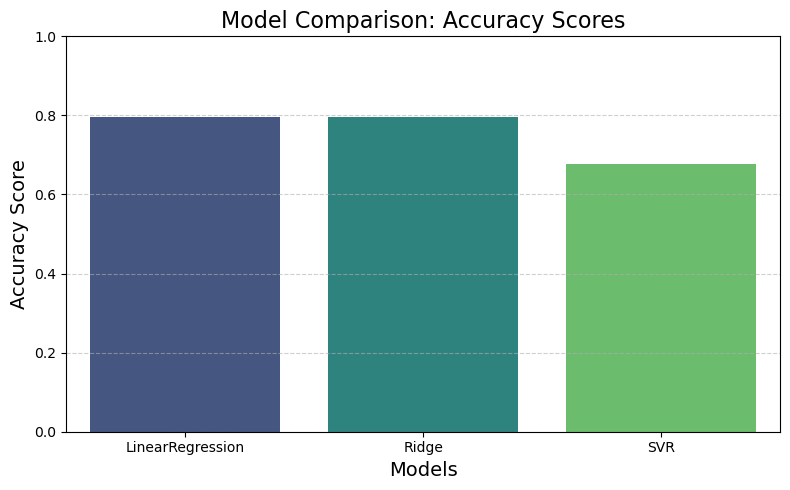

In [55]:
# Plotting the accuracy scores of the models
plt.figure(figsize=(8, 5))
sns.barplot(x=names, y=acc, palette='viridis')
plt.title('Model Comparison: Accuracy Scores', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
# Setting y-axis limit and grid
plt.ylim(0, 1) 
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [56]:
import pickle

pickle.dump(model, open("ridge_model.pkl", "wb"))
